In [27]:
from google.colab import files
uploaded = files.upload()

Saving AC_Data.csv to AC_Data (2).csv


In [29]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "AC_Data.csv" with length 11740134 bytes


In [64]:
import pandas as pd
import numpy as np
df=pd.read_csv("AC_Data.csv")
df=df.rename(columns={"0":"Date"})
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')
df['new_Date']=df['Date'].dt.date
df['Month']=df['Date'].dt.month

In [65]:
df=df.sort_values(by=['new_Date'])
df=df.sort_values(by=['Month'])

In [66]:
df.head()

,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,new_Date,Month
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01,8
28818,2019-08-21 00:18:00,NaN,NaN,4.506421,NaN,NaN,NaN,6.626659,NaN,2.876125,NaN,2.584928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,8
28809,2019-08-21 00:09:00,7.833787,7.851984,NaN,6.492326,1.217645,3.605985,NaN,3.351552,NaN,1.941708,NaN,5.785790,5.670101,NaN,4.027328,4.368648,4.744293,9.086474,2019-08-21,8
28807,2019-08-21 00:07:00,7.077249,6.155709,NaN,7.123649,1.222721,3.729735,NaN,3.328505,NaN,2.037939,NaN,5.791809,5.676738,NaN,3.649620,3.983731,4.734743,9.054438,2019-08-21,8
28806,2019-08-21 00:06:00,NaN,NaN,3.026815,NaN,NaN,NaN,7.129979,NaN,4.597470,NaN,3.203353,NaN,NaN,3.627674,NaN,NaN,NaN,NaN,2019-08-21,8


In [154]:
mean_value=df[['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7','AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18',]].mean()

df[['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7','AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18',]].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [153]:
print(df['AC 1'].sum())

7.51863183594nan7.833786621097.077249023439999nan7.049216796880001nan7.10684912109nan5.966596679689999nannan7.2004355468800005nan7.13480566406nan6.54449316406nannan7.7762402343699994nan7.472905761719999nan4.98731591797nan4.5095747070300005nan4.47294921875nan4.85555468756.65931738281nannannan5.147767089846.6059731445300017.21417578125nan7.34410791016nan5.37057519531nan6.63138525391nannan6.39278320313000056.943866699219999nannan8.19539941406nan7.3635302734399996.355021484380001nannan7.38711718758.768515625nan6.834160644530001nan7.58237011719nan7.4147192382800014.97775390625nannan6.02760302734nan6.41518505859nan6.379788574219999nan6.25806933594nan6.354668945316.465535156256.59882080078nannan7.449614746094.51312988280999955.456226074219999nan6.96524609375nan7.33052490234nannan4.011980712890001nan3.4743408203099997nan3.9316899414099997nan4.033369384774.1175209960900006nan4.46721972656nan5.08291162109nan4.41794873047nan3.88814575195nannannan4.944971679694.36139453125nan2.7303603515599995nan3

In [155]:
print(df['AC 2'].sum())

8.78831542969nan7.8519838867199996.15570947266nan4.56154980469nan0.0nan0.0nannan8.036847167969999nan8.651685546880001nan6.46584912109nannan7.34751855469nan6.584539550780001nan5.244709472659999nan5.371193847660001nan5.95031738281nan6.2019760742199998.41167285156nannannan5.119970703135.0628251953099998.37549804688nan7.273684082030001nan6.52697265625nan7.614055175780001nannan5.641873535166.92040771484nannan7.7108671875nan8.041449218756.351992675780001nannan6.725424804696.26209326172nan6.60087988281nan6.98449902344nan7.883967773446.6494609375nannan7.080355957030001nan7.36098193359nan8.79482324219nan9.36109082031nan5.6823647460899999.1180449218800018.5805234375nannan6.1800751953100015.174900878915.939139648439999nan6.97279980469nan7.24286328125nannan5.9439184570300005nan6.82661425781nan5.905508300780001nan5.794722656254.21369775391nan5.95669091797nan5.52073828125nan5.687095703130001nan6.32918457031nannannan6.672028320314.1947285156300005nan6.01608105469nan5.120145507809999nan5.1190478515599

In [33]:
temp =df.groupby("new_Date")[df.columns[1:-1]].sum().reset_index()

In [34]:
value_list=[
    
    "Overall",
    temp['AC 1'].sum(),
    temp['AC 2'].sum(),
    temp['AC 3'].sum(),
    temp['AC 4'].sum(),
    temp['AC 5'].sum(),
    temp['AC 6'].sum(),
    temp['AC 7'].sum(),
    temp['AC 8'].sum(),
    temp['AC 9'].sum(),
    temp['AC 10'].sum(),
    temp['AC 11'].sum(),
    temp['AC 12'].sum(),
    temp['AC 13'].sum(),
    temp['AC 14'].sum(),
    temp['AC 15'].sum(),
    temp['AC 16'].sum(),
    temp['AC 17'].sum(),
    temp['AC 18'].sum(),
    
]
temp.loc[-1] = value_list 
temp.index = temp.index + 1  
temp = temp.sort_index().replace(0,"-")

In [47]:
print(value_list[1])

103997.4229997089


In [101]:
df5=pd.DataFrame(value_list)
print(df5)

          0
0   Overall
1    103997
2    169113
3    112273
4    104678
5     62151
6    110085
7    130202
8    111389
9    139011
10  67210.2
11   105076
12   118009
13   187113
14   127467
15   176883
16   122390
17   184428
18   282568


In [160]:
df5.drop(0)
df5

,0
1,103997.4229997089
2,169113.14794639772
3,112272.95704198064
4,104678.00526899289
5,62151.00765294759
6,110085.43191506554
7,130202.0093334925
8,111388.85621634885
9,139011.02409215234
10,67210.22798414802


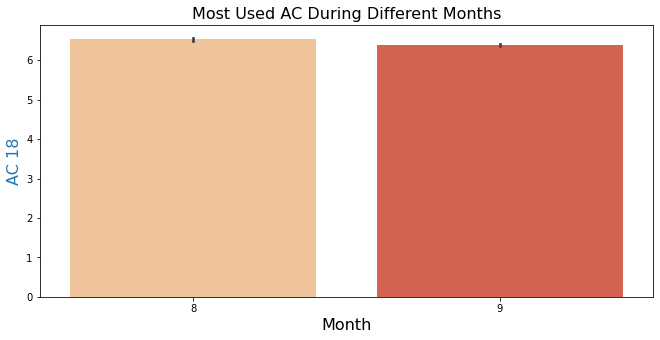

In [172]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(11,5)) 
color = 'tab:blue'
ax1.set_title('Most Used AC During Different Months', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('AC 18', fontsize=16, color=color)
ax2 = sns.barplot(x=df['Month'], y=df['AC 18'], data = df, palette='OrRd')
ax1.tick_params(axis='y')
ax1.grid(False)

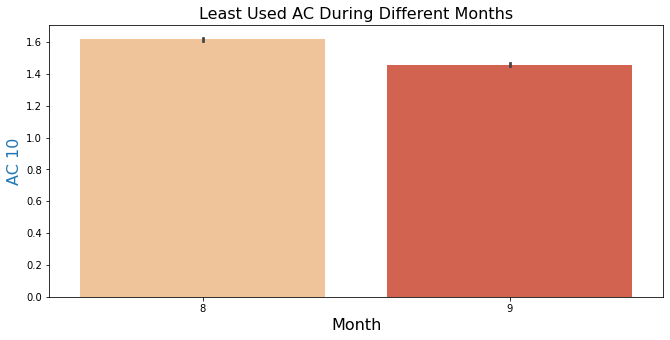

In [174]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(11,5)) 
color = 'tab:blue'
ax1.set_title('Least Used AC During Different Months', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('AC 10', fontsize=16, color=color)
ax2 = sns.barplot(x=df['Month'], y=df['AC 10'], data = df, palette='OrRd')
ax1.tick_params(axis='y')
ax1.grid(False)

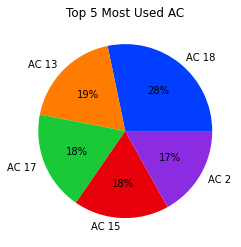

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [282567.569145669, 187112.6309944359, 184428.46239606198,176883.2594244619,169113.14794639772]
labels = ['AC 18', 'AC 13', 'AC 17', 'AC 15', 'AC 2']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Used AC')
plt.show()

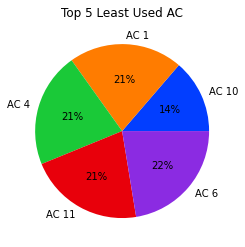

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [67210.22798414802,103997.4229997089, 104678.00526899289,105076.19009676641,110085.43191506554 ]
labels = ['AC 10', 'AC 1', 'AC 4', 'AC 11', 'AC 6']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Least Used AC')
plt.show()

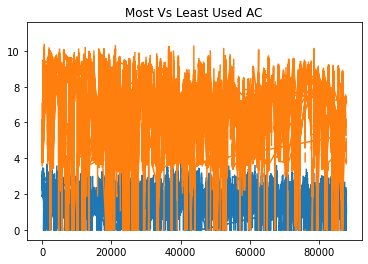

In [178]:
import matplotlib.pyplot as plt

#plot each series
plt.plot(df['AC 10'])
plt.plot(df['AC 18'])
plt.title('Most Vs Least Used AC')

#display plot
plt.show()

**Submitted By Ruhan Siddiqui**